#week 10 - information theory

In [1]:
print("hellow world! ")

hellow world! 


In [4]:
import zlib #also lzma


text = "here is some text some text text text with repitition"
print(f"Original text{len(text)} bytes: ",text)

text_bytes = text.encode('ascii')
comp = zlib.compress(text_bytes)
print(f"Compressed text {len(comp)} bytes: ",comp)

decomp= zlib.decompress(comp)
print("decompressed text :", decomp.decode('ascii'))
ratio = len(comp)/len(text_bytes)
print(f"compression ration: {ratio:.2f}")

Original text53 bytes:  here is some text some text text text with repitition
Compressed text 42 bytes:  b'x\x9c\xcbH-JU\xc8,V(\xce\xcfMU(I\xad(Ab!\x88\xf2\xcc\x92\x0c\x85\xa2\xd4\x82\xcc\x12 \xcc\xcf\x03\x00\x13>\x14 '
decompressed text : here is some text some text text text with repitition
compression ration: 0.79


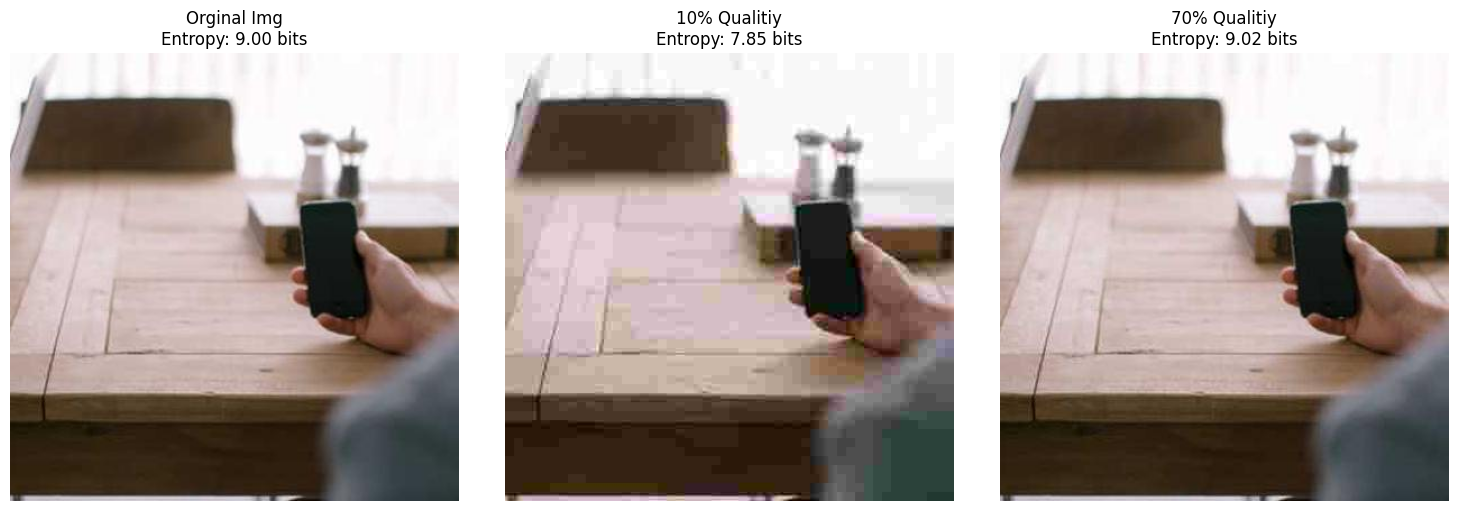

In [6]:
import requests
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

def entropy(img):
    histogram = img.histogram()
    probs = [float(h) / sum(histogram) for h in histogram]
    return -sum(p * np.log2(p) for p in probs if p != 0)

def compress(img, quality=75):
    fname = f'images/q_{quality}.jpg'
    img.save(fname,'JPEG', quality=quality)
    compressed = Image.open(fname)
    return compressed,entropy(compressed)

url = 'https://picsum.photos/400/400'
response = requests.get(url)
orginal = Image.open(BytesIO(response.content))

qualities = [10,70]
images = [orginal]
entropyies=[entropy(orginal)]
titles = ['Orginal Img']
for q in qualities:
    img_c, img_h = compress(orginal,q)
    images.append(img_c)
    entropyies.append(img_h)
    titles.append(f'{q}% Qualitiy')

plt.figure(figsize= (15,5))
for lcv,(img,ent,title) in enumerate(zip(images,entropyies,titles), start=1):
    plt.subplot(1,len(images),lcv)
    plt.imshow(img)
    plt.title(f"{title}\nEntropy: {ent:.2f} bits")
    plt.axis('off')
plt.tight_layout()
plt.show()
